In [2]:
#https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration
#fill nan values with 0 upon importing data, since data doesn't distinguish between 0 and missing
#to save memory, downcast data to integers (keep in mind predictions will prob be floating point)
#parse out the language of each url, and plot total views by language
#some of these won't have a language, so label them as na
#plot each language on its own, show fourier transform for each
#plot views for some random pages
#for each language, find the top visited pages
#create ARIMA predictions for pages wth very high viewcount

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import seaborn as sns

In [12]:
orig_train = pd.read_csv('/Users/christinejiang/Documents/Python/data/train_1.csv')
key = pd.read_csv('/Users/christinejiang/Documents/Python/data/key_1.csv')
submission = pd.read_csv('/Users/christinejiang/Documents/Python/data/sample_submission_1.csv')

In [13]:
train = orig_train.fillna(0)

In [14]:
for col in train.columns[1:]:
    train[col] = pd.to_numeric(train[col], downcast = 'integer')

In [15]:
def find_lang(page):
    match = re.search('[a-z][a-z].wikipedia.org', page)
    if match:
        return match.group(0)[0:2]
    return 'na'

def find_article(page):
    match = re.search('[a-z][a-z].wikipedia.org.', page)
    if match:
        article_end = match.start()-1
        return(page[0:article_end])
    return 'na'

def find_access(page):
    match = re.search('.*.wikipedia.org.', page)
    if match:
        access_start = match.end()+1
        return(page[access_start:])
    return 'na'

train['Language'] = train['Page'].map(find_lang)
train['Article'] = train['Page'].map(find_article)
train['Access'] = train['Page'].map(find_access)

In [19]:
dates = train.iloc[:,1:551]
labels = train[['Article','Language','Access','Page']]
newtrain = pd.concat([labels, dates], axis = 1)

In [20]:
newtrain.head()

,Article,Language,Access,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,ll-access_spider,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,...,32,63,15,26,14,20,22,19,18,20
1,2PM,zh,ll-access_spider,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,...,17,42,28,15,9,30,52,45,26,20
2,3C,zh,ll-access_spider,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute,zh,ll-access_spider,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You,zh,ll-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [83]:
language = newtrain.groupby('Language').sum().reset_index()
transpose = language.T
transpose = transpose.rename(columns = transpose.iloc[0]).drop(transpose.index[0])

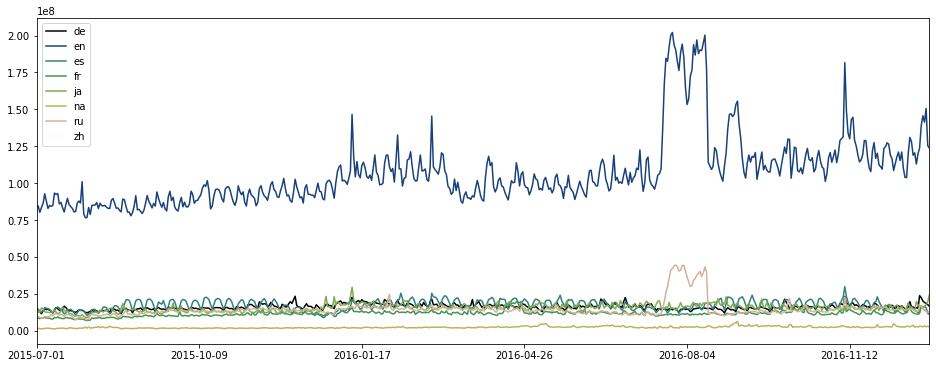

In [97]:
transpose.plot(figsize=(16,6), use_index = True, colormap = "gist_earth")